In [1]:
import pandas as pd
import spacy
import matplotlib.pyplot as plt
import numpy as np
import re
import string

This dataset contains different texts that have been catagorized as either a Spam or a normal text.
I will be developing and training a model on this dataset.
The model should be robust and have higher accuracy in determining whether a text is a Spam or Not.

In [2]:
spam_df = pd.read_csv("C:/Users/Hp Pc/Downloads/Spam_SMS.csv")

In [3]:
spam_df.head(10)

,Class,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


Class
ham     4827
spam     747
Name: count, dtype: int64

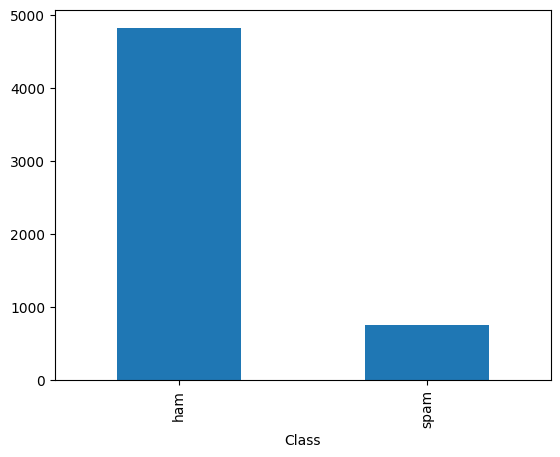

In [4]:
#the dataset is very imbalanced with  

spam_df['Class'].value_counts().plot(kind='bar')
spam_df['Class'].value_counts()

In [5]:
#Percent of Distribution of spam and normal text
spam_df['Class'].value_counts()/spam_df.shape[0]

Class
ham     0.865985
spam    0.134015
Name: count, dtype: float64

In [6]:
spam_df['Len_w'] = spam_df['Message'].apply(lambda x: len(x))

In [7]:
spam_df

,Class,Message,Len_w
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5569,spam,This is the 2nd time we have tried 2 contact u...,160
5570,ham,Will ü b going to esplanade fr home?,36
5571,ham,"Pity, * was in mood for that. So...any other s...",57
5572,ham,The guy did some bitching but I acted like i'd...,125


In [8]:
#some messages turn to be stopwords during vectorization
#So, messages with less than 15 words will dropped 

small_messages = spam_df[spam_df['Len_w'] <= 15]

spam_df = spam_df[~spam_df.index.isin(small_messages.index)]

In [9]:
spam_df.reset_index(drop=True, inplace = True)

In [ ]:
class_map ={
    'ham':0,
    "spam": 1
}

spam_df['Class'] = spam_df['Class'].map(class_map)

In [11]:
spam_df.head(5)

,Class,Message,Len_w
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


TEXT VECTORIZATION

In [12]:
nlp = spacy.load("en_core_web_md")
#using spacy model will fasten our process and we won't have to import CountVectorizer or Tfidfvectorizer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:441: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(
C:\Users\Hp Pc\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\utils\generic.py:309: FutureWarning: `torch.utils._pytree._register_pytree_node` is deprecated. Please use `torch.utils._pytree.register_pytree_node` instead.
  _torch_pytree._register_pytree_node(


In [13]:
#define a function to convert text into vectors 
stops = stopwords.words('english') #deliberately not removing stopword from the text
vectorizer = TfidfVectorizer()
lemmatizer = WordNetLemmatizer()

def get_vectors(text):
    tokens = word_tokenize(text)
    tokens =  [token for token in tokens]

    lemmatizer = WordNetLemmatizer()
    lem_tokens = [lemmatizer.lemmatize(word, pos='v') for word in tokens]
    lem_tokens = ' '.join(lem_tokens)
    
    vectorizer = TfidfVectorizer()
    vectors = vectorizer.fit_transform([lem_tokens]).toarray()
    #norm_text = [word for word in doc if word not in stops]
    #text_vec = np.array([ x.vector for x in doc]) #return the vectors as array
    #text_flat = np.array([vec.flatten() for vec in text_vec])
    return vectors
     

In [14]:
spam_df['text_tokens'] = spam_df['Message'].apply(word_tokenize)

C:\Users\Hp Pc\AppData\Local\Temp\ipykernel_6320\2357499774.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['text_tokens'] = spam_df['Message'].apply(word_tokenize)


In [15]:
spam_df['text_tokens']

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5462    [This, is, the, 2nd, time, we, have, tried, 2,...
5463      [Will, ü, b, going, to, esplanade, fr, home, ?]
5464    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5465    [The, guy, did, some, bitching, but, I, acted,...
5466                  [Rofl, ., Its, true, to, its, name]
Name: text_tokens, Length: 5467, dtype: object

In [16]:
spam_df['text_vec'] = spam_df['Message'].apply(get_vectors)

C:\Users\Hp Pc\AppData\Local\Temp\ipykernel_6320\1164151717.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spam_df['text_vec'] = spam_df['Message'].apply(get_vectors)


In [18]:

x = spam_df['text_vec'].values
y = spam_df['Class'].values

In [19]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

BALANCING IMBALANCE DATA

In [ ]:
from imblearn.over_sampling import SMOTE,RandomOverSampler 

sm = SMOTE(random_state=42) #SMOTE continously raised ValueError: setting an array element with a sequence.

ros = RandomOverSampler(random_state=42)
x_res, y_res = ros.fit_resample(x.reshape(-1,1),y.reshape(-1,1))

In [21]:
print(x_res.shape)
print(y_res.shape)

(9442, 1)
(9442,)


In [22]:
spam_df.shape

(5467, 5)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB, ComplementNB

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x_res, y_res, test_size =0.3, random_state=42)

In [25]:
y_train

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [ ]:
mul_nb = MultinomialNB()

mul_nb.fit(x_train, y_train) #raised ValueError: setting an array element with a sequence.

In [ ]:
mul_preds = mul_nb.predict(x_test)

In [ ]:
com_nb = ComplementNB()

com_nb.fit(x_train,y_train) #raised ValueError: setting an array element with a sequence.

ADOPTING A TOTALLY DIFFERENT METHOD

In [27]:
spam_df

,Class,Message,Len_w,text_tokens,text_vec
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...","[[0.23570226039551587, 0.23570226039551587, 0...."
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[[0.4472135954999579, 0.4472135954999579, 0.44..."
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[[0.1643989873053573, 0.1643989873053573, 0.16..."
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[[0.31622776601683794, 0.31622776601683794, 0...."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[[0.2672612419124244, 0.2672612419124244, 0.26..."
...,...,...,...,...,...
5462,1,This is the 2nd time we have tried 2 contact u...,160,"[This, is, the, 2nd, time, we, have, tried, 2,...","[[0.17149858514250882, 0.17149858514250882, 0...."
5463,0,Will ü b going to esplanade fr home?,36,"[Will, ü, b, going, to, esplanade, fr, home, ?]","[[0.4082482904638631, 0.4082482904638631, 0.40..."
5464,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...","[[0.31622776601683794, 0.31622776601683794, 0...."
5465,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...","[[0.20412414523193154, 0.20412414523193154, 0...."


In [28]:
#Address Possibly obstacles through functions

def convert_to_lower(text):
    return text.lower()

def remove_numbers(text):
    number_pattern = r'\d+'
    wo_numbers  = re.sub(pattern=number_pattern, repl=" ", string=text)
    return wo_numbers

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        lemma_word = lemmatizer.lemmatize(tokens[i])
        tokens[i] = lemma_word
    return " ".join(tokens)

def remove_punct(text):
    return text.translate(str.maketrans('','', string.punctuation))

def remove_stopwords(text):
    removed = []
    tokens = word_tokenize(text)
    for i in range(len(tokens)):
        if tokens[i] not in stops:
            removed.append(tokens[i])

    return " ".join(removed)

def remove_extra_spaces(text):
    pattern = r'\s+[a-zA-Z]\s+'
    wo_spaces = re.sub(pattern, " ", text)
    return wo_spaces

In [ ]:
spam_df['Message'] = spam_df['Message'].apply(lambda x: convert_to_lower(x))
spam_df['Message'] = spam_df['Message'].apply(lambda x: remove_numbers(x))
spam_df['Message'] = spam_df['Message'].apply(lambda x: lemmatize(x))
spam_df['Message'] = spam_df['Message'].apply(lambda x: remove_punct(x))
spam_df['Message'] = spam_df['Message'].apply(lambda x: remove_stopwords(x))
spam_df['Message'] = spam_df['Message'].apply(lambda x: remove_extra_spaces(x))

In [ ]:
spam_df['Length_after_cleaning'] = spam_df['Message'].apply(lambda x: len(x))

In [31]:
spam_df.head(5)

,Class,Message,Len_w,text_tokens,text_vec,Length_after_cleaning
0,0,go jurong point crazy available bugis great wo...,111,"[Go, until, jurong, point, ,, crazy, .., Avail...","[[0.23570226039551587, 0.23570226039551587, 0....",78
1,0,ok lar joking wif oni,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[[0.4472135954999579, 0.4472135954999579, 0.44...",21
2,1,free entry wkly comp win fa cup final tkts st ...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[[0.1643989873053573, 0.1643989873053573, 0.16...",99
3,0,u dun say early hor c already say,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[[0.31622776601683794, 0.31622776601683794, 0....",33
4,0,nah nt think go usf life around though,61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[[0.2672612419124244, 0.2672612419124244, 0.26...",38


MODELLING

In [32]:
#Testing without balancing

x_wob = vectorizer.fit_transform(spam_df['Message'])
x_wob = x_wob.toarray()

In [33]:
x_wob

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [34]:
x_b =spam_df['text_vec']
y_b = spam_df['Class'].values

In [35]:
x_b

0       [[0.23570226039551587, 0.23570226039551587, 0....
1       [[0.4472135954999579, 0.4472135954999579, 0.44...
2       [[0.1643989873053573, 0.1643989873053573, 0.16...
3       [[0.31622776601683794, 0.31622776601683794, 0....
4       [[0.2672612419124244, 0.2672612419124244, 0.26...
                              ...                        
5462    [[0.17149858514250882, 0.17149858514250882, 0....
5463    [[0.4082482904638631, 0.4082482904638631, 0.40...
5464    [[0.31622776601683794, 0.31622776601683794, 0....
5465    [[0.20412414523193154, 0.20412414523193154, 0....
5466    [[0.7071067811865475, 0.35355339059327373, 0.3...
Name: text_vec, Length: 5467, dtype: object

In [36]:
x_train_b,x_test_b,y_train_b,y_test_b = train_test_split(x_wob,spam_df['Class'].values, test_size=0.3, random_state=42)

In [37]:
mul = MultinomialNB()

mul.fit(x_train_b,y_train_b) #Finally worked

MultinomialNB()

In [38]:
mul_preds = mul.predict(x_test_b)

In [39]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score

In [40]:
print(accuracy_score(y_test_b, mul_preds))

0.9634369287020109


In [42]:
pd.crosstab(y_test_b,mul_preds,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,1417,0
1,60,164


In [43]:
print(classification_report(y_test_b,mul_preds))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1417
           1       1.00      0.73      0.85       224

    accuracy                           0.96      1641
   macro avg       0.98      0.87      0.91      1641
weighted avg       0.96      0.96      0.96      1641



In [44]:
com = ComplementNB()

com.fit(x_train_b,y_train_b)

ComplementNB()

In [45]:
com_preds = com.predict(x_test_b)

In [46]:
print(accuracy_score(y_test_b,com_preds))

0.9360146252285192


In [47]:
print(precision_score(y_test_b, com_preds))

0.6963696369636964


In [48]:
pd.crosstab(y_test_b,com_preds,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,1325,92
1,13,211


In [49]:
print(classification_report(y_test_b, com_preds))

              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1417
           1       0.70      0.94      0.80       224

    accuracy                           0.94      1641
   macro avg       0.84      0.94      0.88      1641
weighted avg       0.95      0.94      0.94      1641



SMOTE BALANCING

In [51]:
x_smote, y_smote = sm.fit_resample(x_wob, spam_df['Class'].values)

In [52]:
print(x_smote.shape)
print(y_smote.shape)

(9442, 7439)
(9442,)


In [53]:
#Multinomial NB

mul.fit(x_smote, y_smote)

MultinomialNB()

In [54]:
y_preds = mul.predict(x_test_b)

In [55]:
print(f"Accuracy_score of Smote: ", accuracy_score(y_test_b,y_preds))
print(f"Precision Score of Smote: ", precision_score(y_test_b, y_preds))
print(f"Classification Report: ", classification_report(y_test_b,y_preds))

Accuracy_score of Smote:  0.9829372333942717
Precision Score of Smote:  0.8951612903225806
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99      1417
           1       0.90      0.99      0.94       224

    accuracy                           0.98      1641
   macro avg       0.95      0.99      0.97      1641
weighted avg       0.98      0.98      0.98      1641



In [56]:
pd.crosstab(y_test_b,y_preds,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,1391,26
1,2,222


In [57]:
#Complement NB

com.fit(x_smote, y_smote)

ComplementNB()

In [58]:
yy_preds = com.predict(x_test_b)

In [59]:
print(f"Accuracy_score of Smote: ", accuracy_score(y_test_b,yy_preds))
print(f"Precision Score of Smote: ", precision_score(y_test_b, yy_preds))
print(f"Classification Report: ", classification_report(y_test_b,yy_preds))

Accuracy_score of Smote:  0.9829372333942717
Precision Score of Smote:  0.8951612903225806
Classification Report:                precision    recall  f1-score   support

           0       1.00      0.98      0.99      1417
           1       0.90      0.99      0.94       224

    accuracy                           0.98      1641
   macro avg       0.95      0.99      0.97      1641
weighted avg       0.98      0.98      0.98      1641



In [60]:
pd.crosstab(y_test_b,yy_preds,rownames=['Actual'], colnames=['Predicted'])

Predicted,0,1
Actual,,
0,1391,26
1,2,222
